In [1]:
import pandas as pd
from get_SAB import *
import copy
import numpy as np 
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.pyplot import figure
import matplotlib


In [2]:

info = {}
info2 = {}
maxSAB = 0.0
with open('leaprRun/tape24','r') as f:
    lines = [line for line in f.readlines() if line[71:75] == '7  4']

    nbeta  = getVal(lines[4],5,'int')
    nalpha = getVal(lines[6],5,'int')
    numAlphaLines = ceil(nalpha/3)
    lines = lines[6:]

    for ibeta in range(nbeta):
        offset = 2
        beta = getVal(lines[0],1)
        alphas, sab = [], []
        for i in range(numAlphaLines):
            for j in range(3):
                alphas.append(getVal(lines[offset+i],2*j  ))
                sabVal = getVal(lines[offset+i],2*j+1)
                sabVal = np.log(sabVal) if sabVal > 1e-9 else -20
                sab.append(sabVal)
                if sab[-1] > maxSAB:
                    maxSAB = sab[-1]
        info[beta] = [alphas,sab]
        info2[beta] = sab
        lines = lines[numAlphaLines+offset:]

    betas = (list(info.keys()))


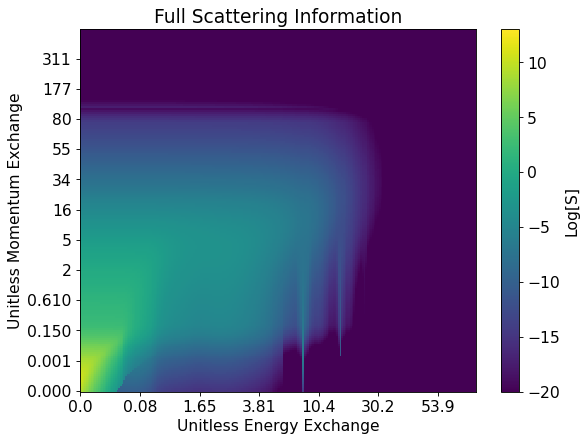

In [3]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
matplotlib.rcParams.update({'font.size': 14})
df = pd.DataFrame(data=info2)
df2 = pd.DataFrame(data=info2, index=alphas,columns=betas)

# plt.pcolor(df, norm=LogNorm(vmin=1e-20, vmax=maxSAB))#, cmap='PuBu_r')
plt.pcolor(df2, vmin=-20, vmax=13)#, cmap='PuBu_r')
plt.colorbar(label='Log[S]')
plt.yticks(np.arange(0.5, len(df2.index), 15), ['%.3f'%x if x < 1 else '%.0f'%x for x in df2.index[::15] ])
plt.xticks(np.arange(0.5, len(df2.columns), 35), df2.columns[::35])
plt.xlabel('Unitless Energy Exchange')
plt.ylabel('Unitless Momentum Exchange')
plt.title('Full Scattering Information')
plt.show()

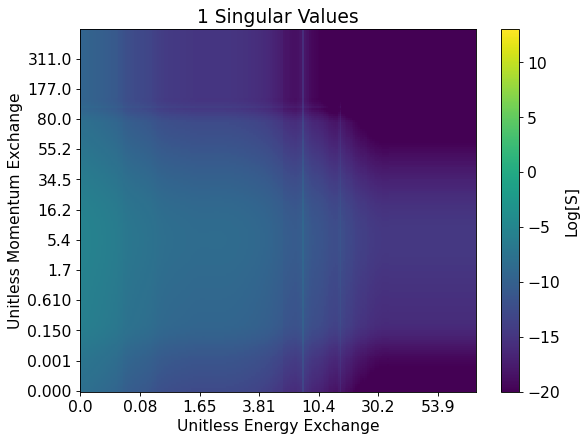

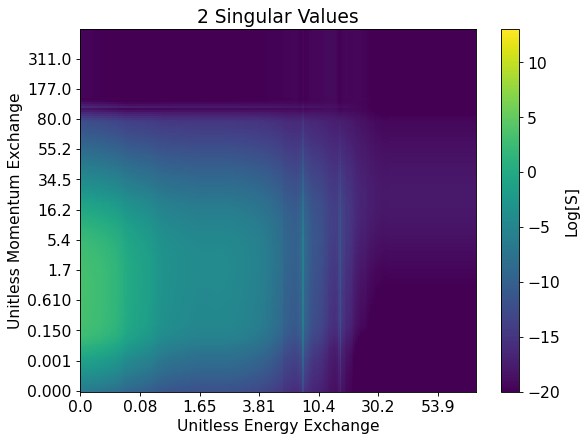

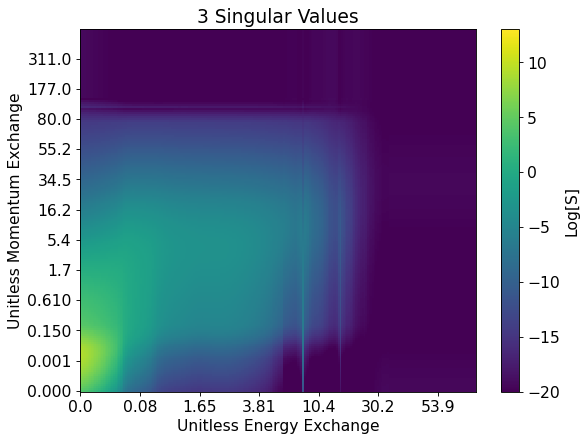

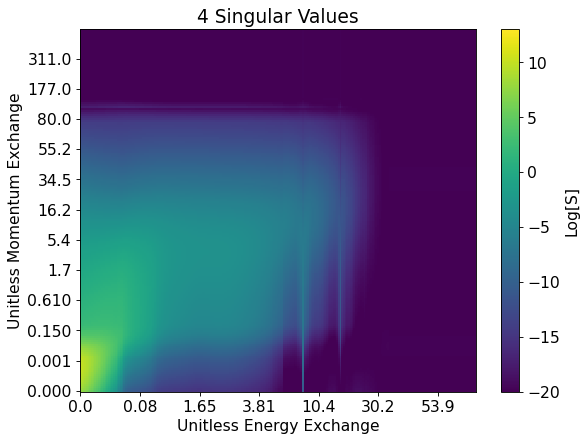

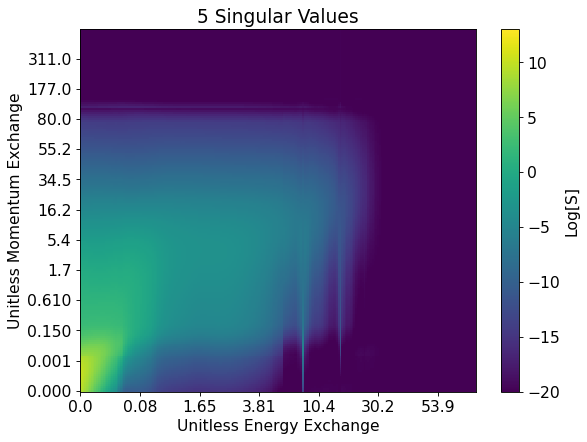

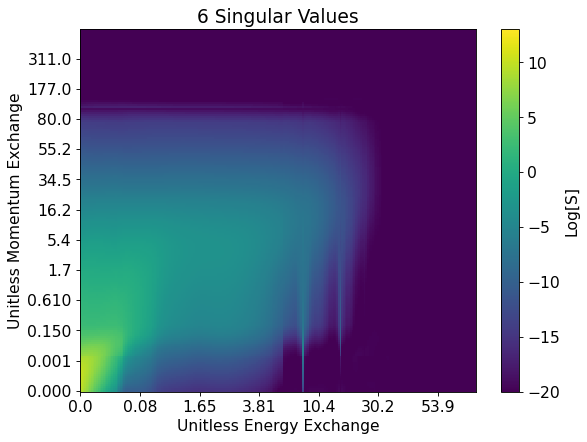

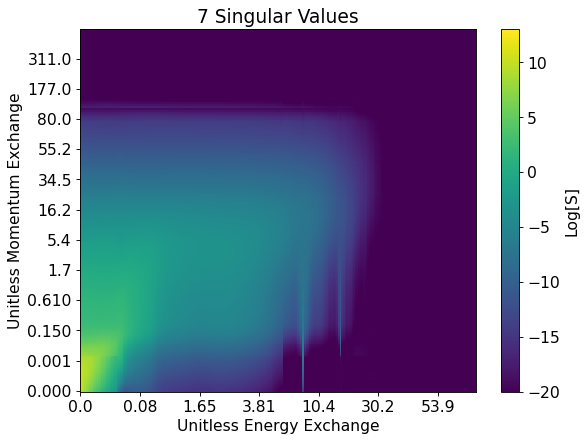

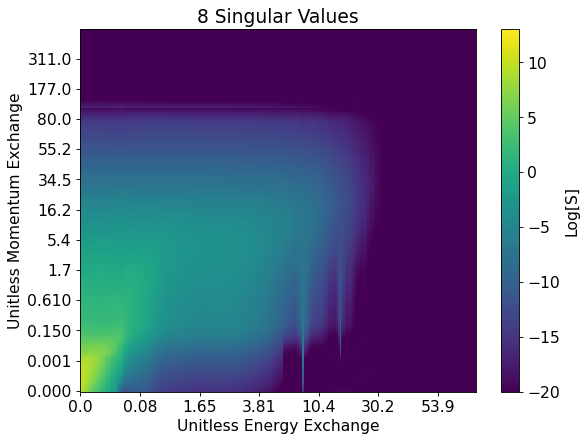

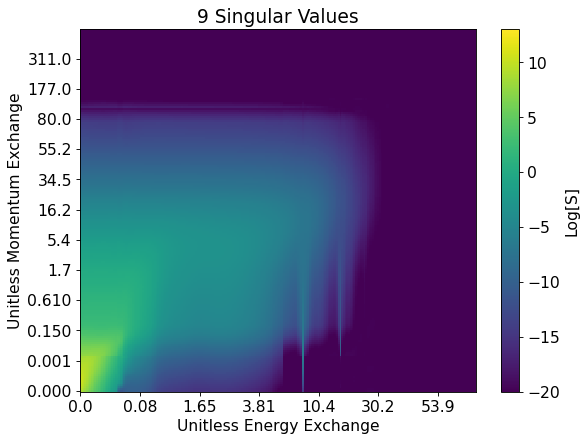

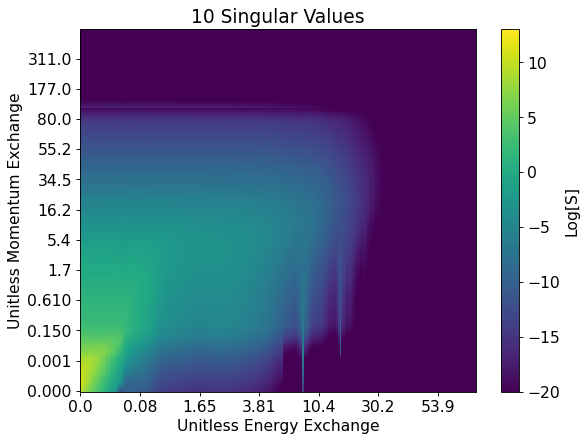

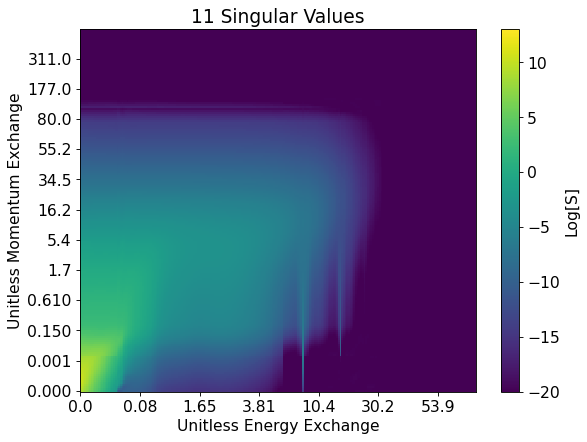

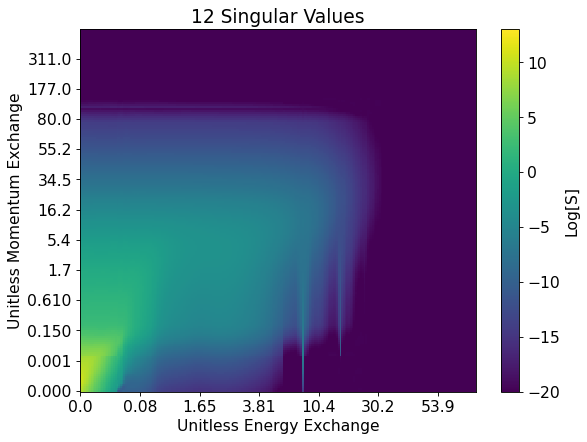

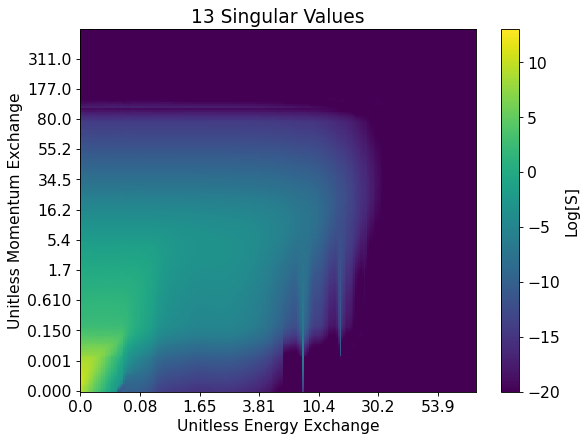

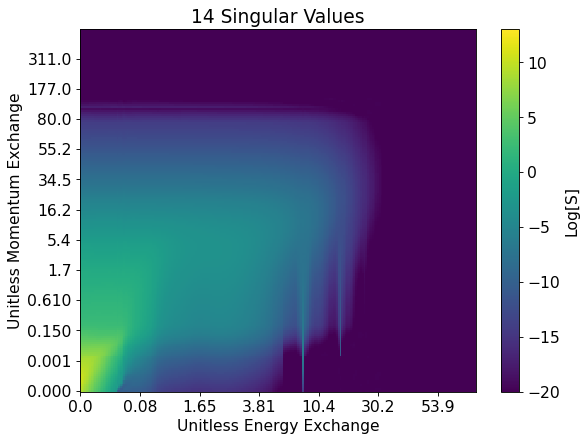

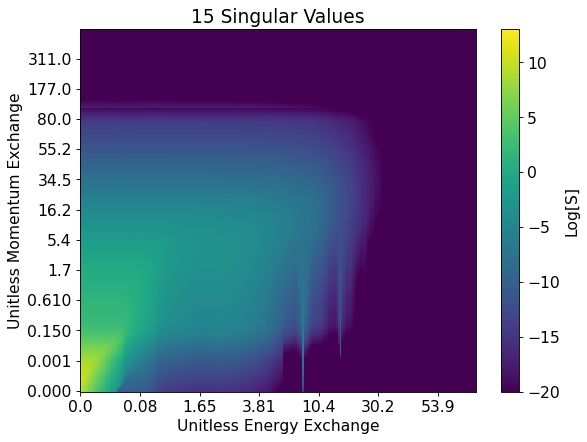

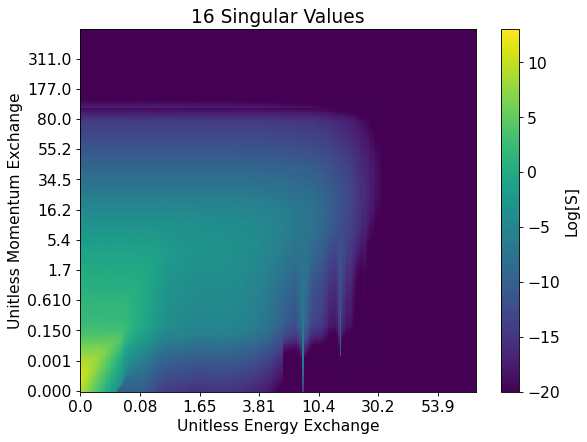

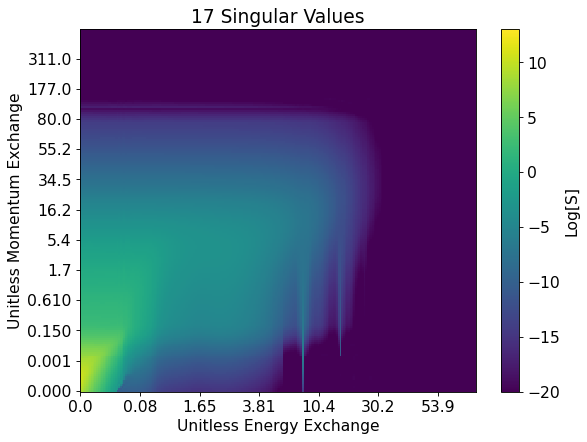

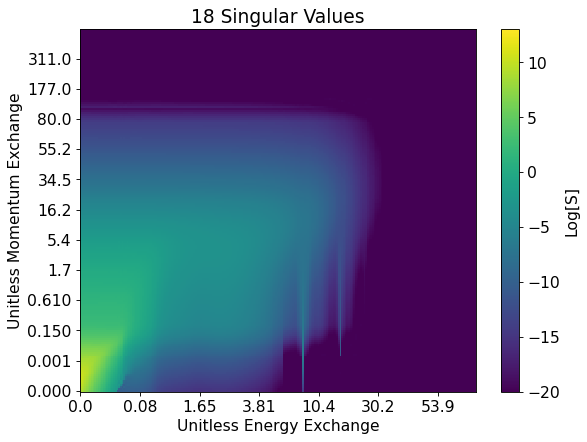

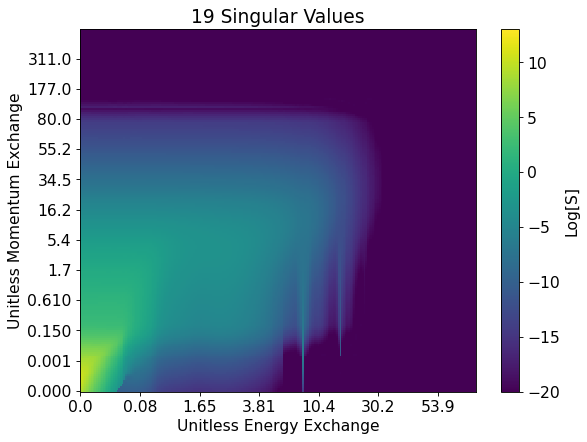

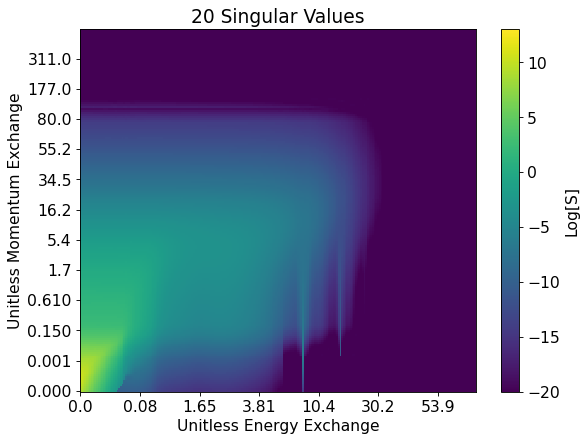

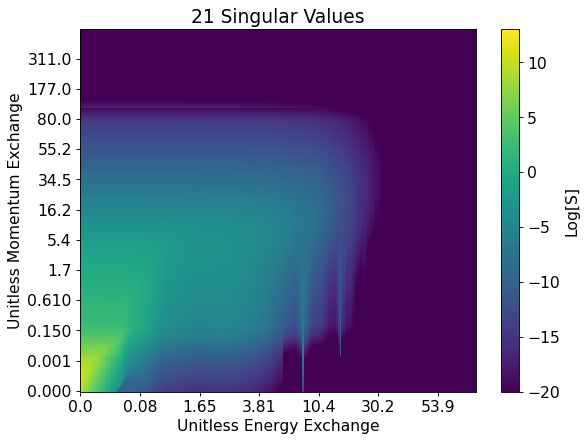

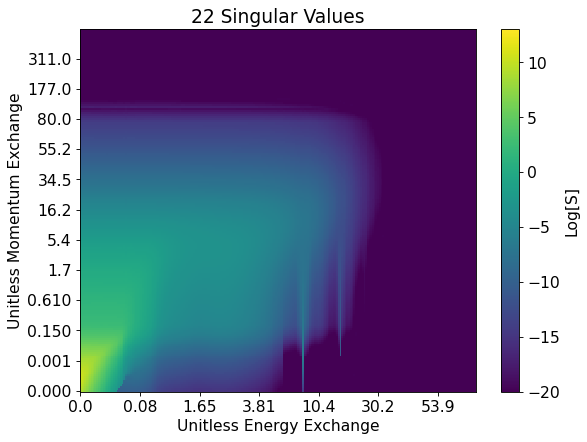

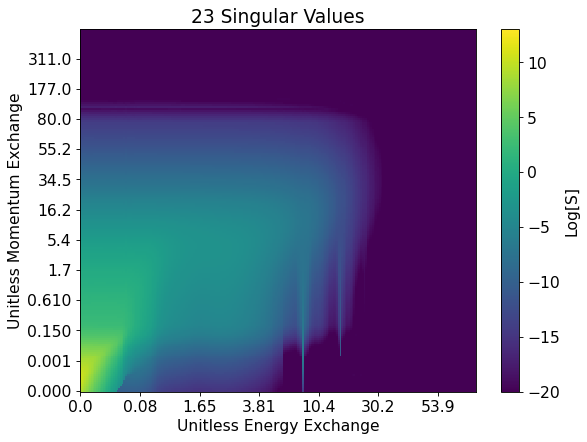

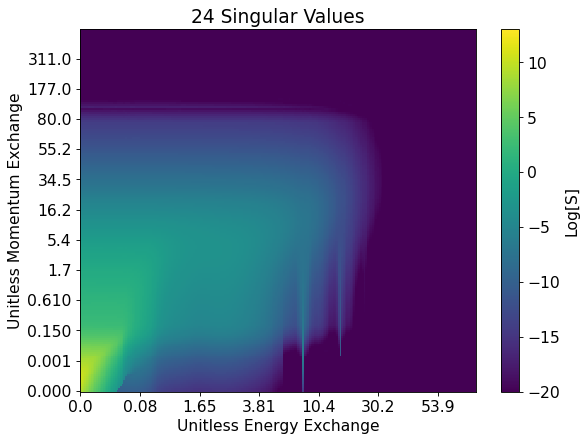

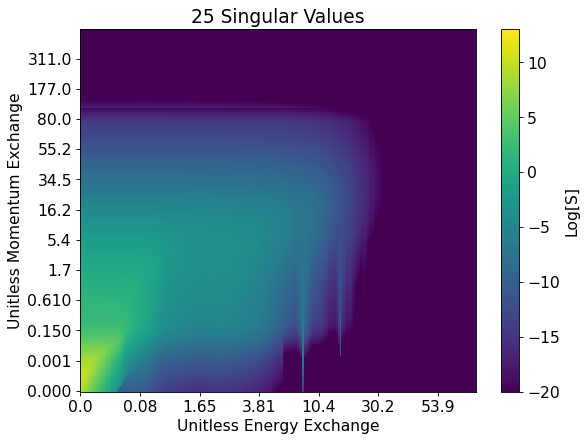

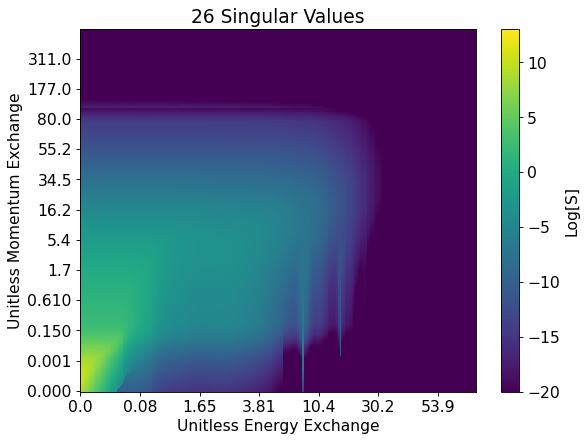

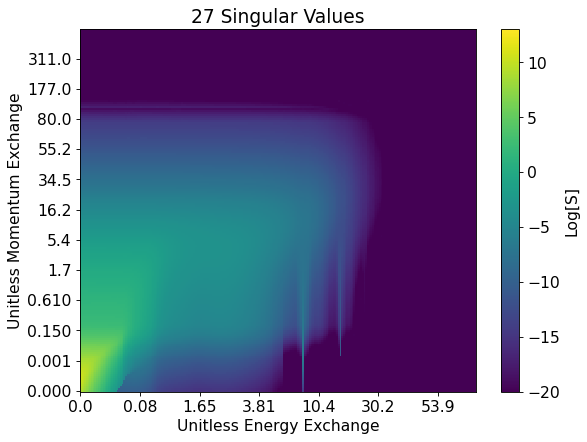

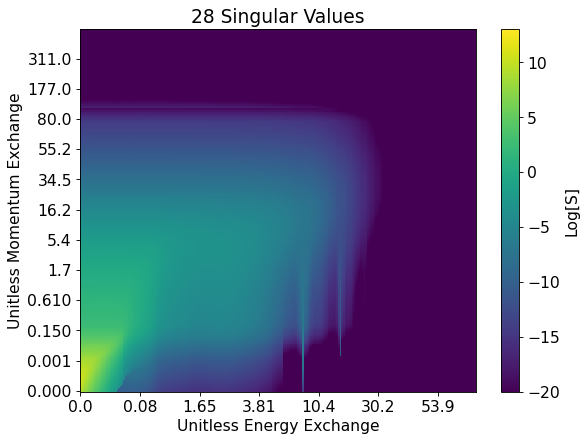

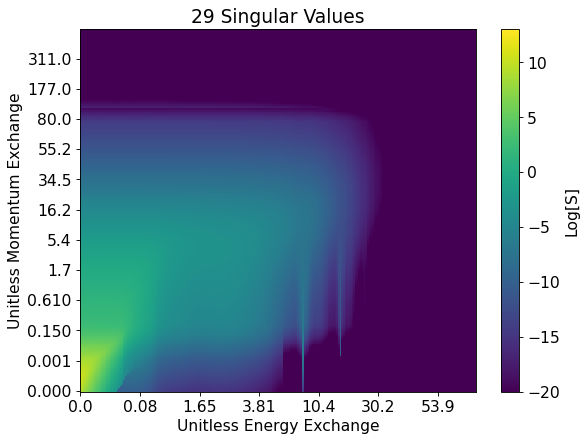

In [4]:
U, sigma, V = np.linalg.svd(df)
norms = []
numEigenVec = list(range(1,30))
for numEigenvals in numEigenVec:
    figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    matplotlib.rcParams.update({'font.size': 14})
    A_approx = np.matrix(U[:, :numEigenvals]) * np.diag(sigma[:numEigenvals]) * np.matrix(V[:numEigenvals, :])
    A_approx_df = pd.DataFrame(A_approx)
    norms.append(np.linalg.norm(A_approx_df))
    plt.pcolor(A_approx_df, vmin=-20, vmax=13)
    plt.colorbar(label='Log[S]')
    plt.yticks(np.arange(0.5, len(df2.index), 15), ['%.3f'%x if x < 1 else '%.1f'%x for x in df2.index[::15] ])
    plt.xticks(np.arange(0.5, len(df2.columns), 35), df2.columns[::35])
    plt.xlabel('Unitless Energy Exchange')
    plt.ylabel('Unitless Momentum Exchange')
    plt.title(str(numEigenvals)+' Singular Values')
    plt.show()

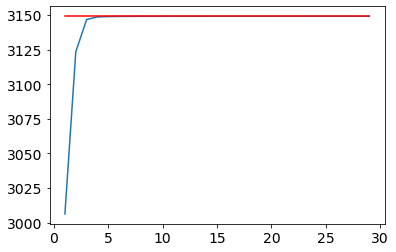

In [5]:
plt.plot(numEigenVec,norms)
plt.plot([numEigenVec[0],numEigenVec[-1]],[np.linalg.norm(df),np.linalg.norm(df)],'r')
# plt.ylim([774000,774200])

Text(0.5, 1.0, 'Singular Values of S($\\alpha,\\beta$)')

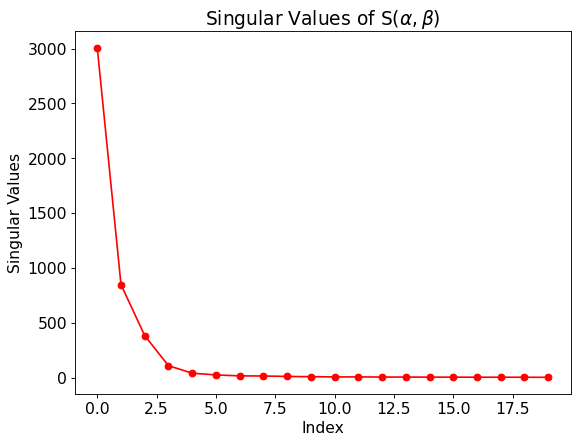

In [6]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(sigma[:20],'ro-')
plt.ylabel('Singular Values')
plt.xlabel('Index')
plt.title(r'Singular Values of S($\alpha,\beta$)')

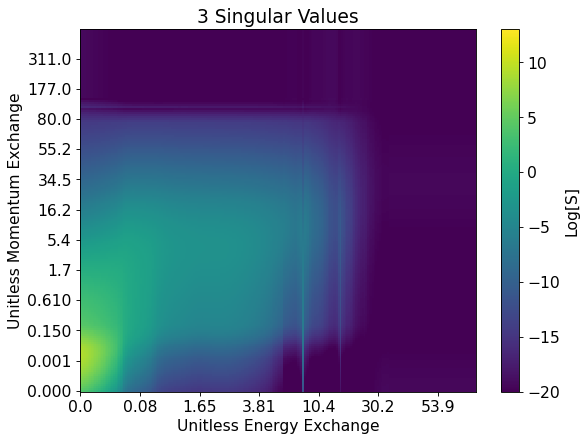

In [7]:
U, sigma, V = np.linalg.svd(df)
norms = []
numEigenvals = 3
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
matplotlib.rcParams.update({'font.size': 14})
A_approx = np.matrix(U[:, :numEigenvals]) * np.diag(sigma[:numEigenvals]) * np.matrix(V[:numEigenvals, :])
A_approx_df = pd.DataFrame(A_approx)
plt.pcolor(A_approx_df, vmin=-20, vmax=13)
plt.colorbar(label='Log[S]')
plt.yticks(np.arange(0.5, len(df2.index), 15), ['%.3f'%x if x < 1 else '%.1f'%x for x in df2.index[::15] ])
plt.xticks(np.arange(0.5, len(df2.columns), 35), df2.columns[::35])
plt.xlabel('Unitless Energy Exchange')
plt.ylabel('Unitless Momentum Exchange')
plt.title(str(numEigenvals)+' Singular Values')
plt.show()

In [11]:
U, sigma, V = np.linalg.svd(df)
numSingularValues = 3
Unew = U[:,:numSingularValues]
Vnew = V[:numSingularValues,:]
signew = np.diag(sigma[:numSingularValues])

print(A_approx.shape)
print(nalpha)
print(nbeta)


approx_s = np.matrix(Unew) * signew * np.matrix(Vnew)
print("\nShowing how to get the (a0,b0) value from matrix components")
print(approx_s[0,:][:,0])
print(Unew[0][0]*signew[0][0]*Vnew[0][0]+
      Unew[0][1]*signew[1][1]*Vnew[1][0]+
      Unew[0][2]*signew[2][2]*Vnew[2][0])

print("\nShowing how to get the (a0,b1) value from matrix components")
print(approx_s[0,:][:,1])
print(Unew[0][0]*signew[0][0]*Vnew[0][1]+
      Unew[0][1]*signew[1][1]*Vnew[1][1]+
      Unew[0][2]*signew[2][2]*Vnew[2][1])

print("\nShowing how to get the (a1,b0) value from matrix components")
print(approx_s[1,:][:,0])
print(Unew[1][0]*signew[0][0]*Vnew[0][0]+
      Unew[1][1]*signew[1][1]*Vnew[1][0]+
      Unew[1][2]*signew[2][2]*Vnew[2][0])


(180, 233)
180
233

Showing how to get the (a0,b0) value from matrix components
[[4.76915402]]
4.769154017145773

Showing how to get the (a0,b1) value from matrix components
[[4.06252699]]
4.06252699157314

Showing how to get the (a1,b0) value from matrix components
[[5.27929315]]
5.279293148833643


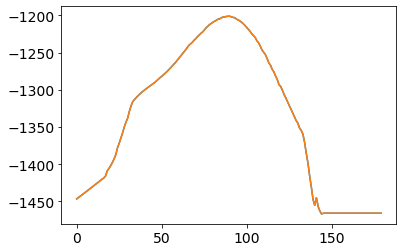

In [14]:
U, sigma, V = np.linalg.svd(df)
numSingularValues = 3
Unew = U[:,:numSingularValues]
Vnew = V[:numSingularValues,:]
signew = np.diag(sigma[:numSingularValues])

approx_s = np.array(np.matrix(Unew) * signew * np.matrix(Vnew))

# print(len(approx_s[0,:]))
# print(nbeta)

deltaBeta = [(betas[1]-betas[0])*0.5]
for i in range(len(betas)-2):
    deltaBeta.append((betas[2+i]-betas[i])*0.5)
deltaBeta.append((betas[-1]-betas[-2])*0.5)

# Let's get S(alpha) by integrating across all betas
S_a = []
for i in range(len(alphas)):
    thisRow = np.array(np.matrix(Unew[i]*signew.diagonal()) * np.matrix(Vnew))[0,:]
    S_a.append(np.dot(deltaBeta,thisRow))
    
plt.plot(S_a)    
    
S_a_usingTrapz = []
for i in range(len(alphas)):
    thisRow = np.array(np.matrix(Unew[i]*signew.diagonal()) * np.matrix(Vnew))[0,:]
    S_a_usingTrapz.append(np.trapz(approx_s[i,:],betas))
    
plt.plot(S_a_usingTrapz)    
    

# firstColumn = approx_s[:,0]
# print(len(firstColumn),nalpha)

In [24]:
def getAlphaMinMax(E,beta,kbT,A0):
    aMin = (np.sqrt(E)-np.sqrt(E+beta*kbT))**2 / (A0*kbT)
    aMax = (np.sqrt(E)+np.sqrt(E+beta*kbT))**2 / (A0*kbT)    
    return aMin,aMax

In [25]:
A0 = 1.0
E = 0.5 
kbT = 0.0253
bMin = -E/kbT
bMax = 20.0
print(bMin,bMax)


-19.76284584980237 20.0


In [28]:
betas

[0.0,
 5.017e-06,
 6.6893e-06,
 8.919e-06,
 1.1892e-05,
 1.5856e-05,
 2.1141e-05,
 2.8189e-05,
 3.7585e-05,
 5.0113e-05,
 6.6817e-05,
 8.909e-05,
 0.00011879,
 0.00015838,
 0.00021118,
 0.00028157,
 0.00037542,
 0.00050056,
 0.00066742,
 0.00088989,
 0.0011865,
 0.001582,
 0.0021094,
 0.0028125,
 0.00375,
 0.005,
 0.01,
 0.015,
 0.02,
 0.025,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.1,
 0.125,
 0.15,
 0.175,
 0.2,
 0.225,
 0.25,
 0.3,
 0.35,
 0.4,
 0.45,
 0.5,
 0.55,
 0.6,
 0.65,
 0.7,
 0.75,
 0.8,
 0.85,
 0.9,
 0.95,
 1.0,
 1.05,
 1.1,
 1.15,
 1.2,
 1.25,
 1.3,
 1.35,
 1.4,
 1.45,
 1.5,
 1.55,
 1.6,
 1.65,
 1.7,
 1.75,
 1.8,
 1.85,
 1.9,
 1.95,
 2.0,
 2.05,
 2.1,
 2.15,
 2.2,
 2.25,
 2.3,
 2.35,
 2.4,
 2.45,
 2.5,
 2.55,
 2.6,
 2.65,
 2.7127,
 2.77,
 2.83,
 2.9,
 2.96,
 3.03,
 3.11,
 3.18,
 3.26,
 3.34,
 3.43,
 3.52,
 3.61,
 3.71,
 3.81,
 3.92,
 4.03,
 4.14,
 4.26,
 4.39,
 4.52,
 4.65,
 4.8,
 4.94,
 5.1,
 5.26,
 5.4255,
 5.6,
 5.7,
 5.97,
 6.17,
 6.37,
 6.59,
 6.81,
 7.04,
 7.29,


In [27]:
# getting G(b=bmin|E,T)
beta = [beta for betbMin
aMin,aMax = getAlphaMinMax(E,beta,kbT,A0)
print(aMin,aMax)

19.762845849802375 19.762845849802375


In [8]:
final_SAB_approx = []
for i in range(len(A_approx_df)):
    thisVec = []
    for j in range(len(A_approx_df[0])):
        thisVec.append(np.exp(A_approx_df[i][j]))
    final_SAB_approx.append(thisVec)

In [9]:
true_df = pd.DataFrame(data=info2)
true_df.columns = list(range(len(true_df.columns)))
true_df.index = list(range(len(true_df[0])))
final_SAB = []
for i in range(len(true_df)):
    thisVec = []
    for j in range(len(true_df[0])):
        thisVec.append(np.exp(true_df[i][j]))
    final_SAB.append(thisVec)

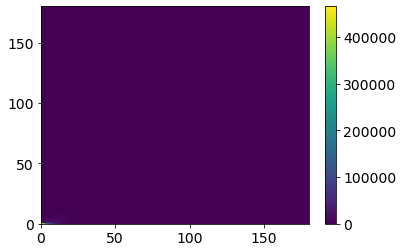

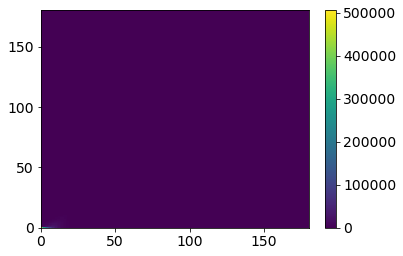

In [10]:
plt.pcolor(final_SAB_approx)
plt.colorbar()
plt.show()
plt.pcolor(final_SAB)
plt.colorbar()